In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import xgboost as xgb
import pickle
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [25]:
df = pd.read_csv('../dataset/updated_ds_jobs_2021.csv')

What we will do

- Choose relevant columns
- Get dummy data
- Train - Test split
- Test various types of models
    - Multiple Linear Regression
    - Lasso Regression
    - Random Forest
    - Gradiant Booster Tree
    - Support Vector Regression
    - Neural Network Regressor
- Tune the Models using GridsearchCV
- Test Ensembles

In [26]:
df.columns

Index(['job_title', 'seniority', 'job_title_sim', 'job_description', 'python',
       'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'higher_degree', 'higher_degree_needed', 'avg_salary_hour',
       'avg_salary_month', 'avg_salary_year', 'employer_provided',
       'job_location', 'job_location_city', 'company', 'company_headquarters',
       'company_headquarters_city', 'same_place', 'rating',
       'number_of_workers', 'revenue(USD)', 'founded', 'type_of_ownership',
       'industry', 'sector', 'age', 'competitors', 'number_competitors'],
      dtype='object')

We will be using only a few selected columns to speed the process

In [27]:
#choosing relevant columns
df_model = df[['avg_salary_month','python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an']]

The code below would be all the columns we could use for this prediction

In [28]:
#choosing relevant columns
#df_model = df[['avg_salary_month','rating', 'number_of_workers', 'type_of_ownership', 'revenue(USD)', 'number_competitors', 'employer_provided', 'same_place', 'age', 'python', 'spark', 'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit',
#       'tensor', 'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an', 'job_title_sim', 'seniority', 'sector', 'industry', 'job_location']]

In [29]:

#to show all rows
pd.set_option('display.max_columns', None)

#getting dummy data
df_dum = pd.get_dummies(df_model)

df_dum

,avg_salary_month,python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
0,6001.0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0
1,7292.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7084.0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
3,6375.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9542.0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,7041.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
718,8542.0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
719,6126.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
720,10625.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
#Train - Test split
X = df_dum.drop('avg_salary_month', axis = 1)
y = df_dum.avg_salary_month.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
#Multiple Linear Regression
#statsmodel
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     9.520
Date:                Wed, 24 Apr 2024   Prob (F-statistic):           1.01e-21
Time:                        13:32:15   Log-Likelihood:                -6749.1
No. Observations:                 722   AIC:                         1.353e+04
Df Residuals:                     705   BIC:                         1.361e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8100.4933    203.593     39.788      0.000    7700.773    8500.214
python      1716.7239    244.329      7.026      0.000    1237.025    2196.423
spark       -213.1748    338.404     -0.630      0.529    -877.574     451.225
aws          765.9264    272.164      2.814      0.005     231.578    1300.275
excel       -413.4388    214.465     -1.928      0.054    -834.506       7.628
sql         -979.8962    253.864     -3.860      0.000   -1478.316    -481.477
sas         1448.3430    385.151      3.760      0.000     692.162    2204.524
keras       -304.6709    688.138     -0.443      0.658   -1655.715    1046.373
pytorch    -1670.1397    627.426     -2.662      0.008   -2901.987    -438.292
scikit      1088.8121    513.115      2.122      0.034      81.396    2096.228
tensor      1254.9345    558.949      2.245      0.025     157.531    2352.338
hadoop       407.4266    349.995      1.164      0.245    -279.730    1094.583
tableau     -494.8543    316.962     -1.561      0.119   -1117.156     127.448
bi          -520.4251    455.404     -1.143      0.254   -1414.535     373.685
flink        298.2235    944.751      0.316      0.752   -1556.638    2153.086
mongo        737.8994    519.936      1.419      0.156    -282.910    1758.709
google_an  -2410.3718    771.426     -3.125      0.002   -3924.940    -895.804
==============================================================================
Omnibus:                       76.542   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.210
Skew:                           0.816   Prob(JB):                     6.39e-23
Kurtosis:                       3.858   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is alot of Multicollinearity  in this data (occurs when two or more independent variables have a high correlation with one another in a regression model)m so this first model will serve more of a analysis.


Our model explains arround 68.9% in the variotion of the monthly salaries (R-squared)
P values less than 0.05 means they are significant in our model. When a p-value is reported as p = 0.000, the actual p-value is too small for the software to display 

- For each additional Rating, we have +403.36 dollars monthly in the salary
- For each additional number of competitor, it adds 183 dollars monthly in the salary
- Some skills appear to have value in the salary, some appear to not impact it at all
- Some industries are more likely to pay more money than others, others pay less
- Same for all categories


Put more insights here

In [32]:
#sklearn
lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-2190.757221080543

neg_mean_absolute_error -> how far we are on average from our general prediction

10,346 = 10.346 dollars

,alpha,error
98,0.99,-2182.089685


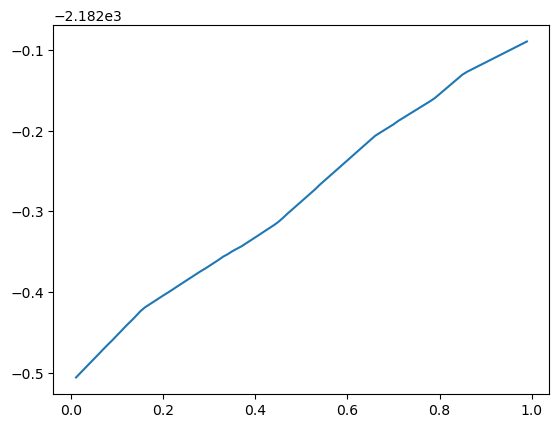

In [33]:
#lasso regression 
lm_l = Lasso(alpha=0.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 5)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


In [34]:
# random forest 
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))


-2040.788612018062

In [35]:
# tune models GridsearchCV 
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)


c:\Users\flpro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
348 fits failed out of a total of 522.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
261 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\flpro\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\flpro\anaconda3\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\flpro\anaconda3\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\flpro\anaconda3\lib\site-packag

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [36]:
gs.best_score_

-2014.6797754621064

In [37]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=140)

In [38]:
#XGBoost

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define hyperparameters
params = {
    'objective': 'reg:linear',  # for regression tasks
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100
}


# Train the model with early stopping
bst = xgb.train(params, dtrain, num_boost_round=100, evals=[(dtest, 'eval')], early_stopping_rounds=10)

# Get the best score
best_score = bst.best_score

best_score

[0]	eval-rmse:3459.51806
[1]	eval-rmse:3420.94202
[2]	eval-rmse:3394.39535
[3]	eval-rmse:3371.17742
[4]	eval-rmse:3355.56539
[5]	eval-rmse:3341.45494
[6]	eval-rmse:3325.88608
[7]	eval-rmse:3308.43330
[8]	eval-rmse:3294.90633
[9]	eval-rmse:3283.23782
[10]	eval-rmse:3263.35527
[11]	eval-rmse:3254.35979
[12]	eval-rmse:3248.33009
[13]	eval-rmse:3238.29436
[14]	eval-rmse:3232.17386
[15]	eval-rmse:3215.82827
[16]	eval-rmse:3212.87692
[17]	eval-rmse:3194.70296
[18]	eval-rmse:3186.36472
[19]	eval-rmse:3182.13094
[20]	eval-rmse:3175.48470
[21]	eval-rmse:3162.61995
[22]	eval-rmse:3147.59425
[23]	eval-rmse:3146.59755
[24]	eval-rmse:3142.72530
[25]	eval-rmse:3140.59537
[26]	eval-rmse:3138.57850
[27]	eval-rmse:3136.47185
[28]	eval-rmse:3129.04477
[29]	eval-rmse:3120.49756
[30]	eval-rmse:3117.37096
[31]	eval-rmse:3111.25253
[32]	eval-rmse:3104.40567
[33]	eval-rmse:3103.52961
[34]	eval-rmse:3101.14494
[35]	eval-rmse:3096.06343
[36]	eval-rmse:3077.57605
[37]	eval-rmse:3071.60149
[38]	eval-rmse:3066.30

c:\Users\flpro\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
c:\Users\flpro\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [13:33:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


2955.1977544064093

In [39]:
# Create a Support Vector Regression (SVR) model
svr = SVR()

# Fit the model on the training data
svr.fit(X_train, y_train)

# Make predictions
predictions = svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 12648358.842507116


In [40]:
# Create a Neural Network Regressor model
mlp_regressor = MLPRegressor(random_state=1, max_iter=500)

# Fit the model on the training data
mlp_regressor.fit(X_train, y_train)

# Make predictions
predictions = mlp_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, predictions)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 65348165.380945444


c:\Users\flpro\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [41]:
# test ensembles 
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)
tpred_xg = bst.predict(xgb.DMatrix(X_test))
tpred_svr = svr.predict(X_test)
tpred_mlp = mlp_regressor.predict(X_test)

In [42]:
#lm
print(f"Mean Absolute Error (Linear Regression): { mean_absolute_error(y_test,tpred_lm)}")

#lml
print(f"Mean Absolute Error (Lasso Regression): {mean_absolute_error(y_test,tpred_lml)}")

#random forest
print(f"Mean Absolute Error (Random Forest): {mean_absolute_error(y_test,tpred_rf)}")

#XGBoost
print(f"Mean Absolute Error (XGBoost): {mean_absolute_error(y_test,tpred_xg)}")

#SVR
print(f"Mean Absolute Error (SVR): {mean_absolute_error(y_test,tpred_svr)}")

#Neural Network Regressor
print(f"Mean Absolute Error (Neural Network Regressor): {mean_absolute_error(y_test,tpred_mlp)}")


Mean Absolute Error (Linear Regression): 2383.127508651029
Mean Absolute Error (Lasso Regression): 2382.8553456700824
Mean Absolute Error (Random Forest): 2038.3697536945808
Mean Absolute Error (XGBoost): 2189.7710398706895
Mean Absolute Error (SVR): 2651.4134779864257
Mean Absolute Error (Neural Network Regressor): 7303.678636321089


In [43]:
#combining two models

#Linear Regression + Random Forest
print(f"Mean Absolute Error (Linear Regression + Random Forest): {mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)}")

#Lasso Regression + Random Forest
print(f"Mean Absolute Error (Lasso Regression + Random Forest): {mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)}")

#Lasso Regression + Linear Regression
print(f"Mean Absolute Error (Lasso Regression + Linear Regression): {mean_absolute_error(y_test,(tpred_lml+tpred_lm)/2)}")

#XGBoost + Random Forest
print(f"Mean Absolute Error (XGBoost + Random Forest): {mean_absolute_error(y_test,(tpred_xg+tpred_rf)/2)}")

#SVR + Random Forest
print(f"Mean Absolute Error (SVR + Random Forest): {mean_absolute_error(y_test,(tpred_svr+tpred_rf)/2)}")

#Neural Network Regressor + Random Forest
print(f"Mean Absolute Error (Neural Network Regressor + Random Forest): {mean_absolute_error(y_test,(tpred_mlp+tpred_rf)/2)}")



Mean Absolute Error (Linear Regression + Random Forest): 2169.8889793466196
Mean Absolute Error (Lasso Regression + Random Forest): 2169.8340873515103
Mean Absolute Error (Lasso Regression + Linear Regression): 2382.9914271605558
Mean Absolute Error (XGBoost + Random Forest): 2093.243452220597
Mean Absolute Error (SVR + Random Forest): 2293.570244115062
Mean Absolute Error (Neural Network Regressor + Random Forest): 3875.400075391648


In [44]:
#combining three models

#Neural Network Regressor + XGBoost + Random Forest
print(f"Mean Absolute Error (Neural Network Regressor + XGBoost + Random Forest): {mean_absolute_error(y_test,(tpred_mlp+tpred_xg+tpred_rf)/3)}")

#Neural Network Regressor + Lasso Regression + Linear Regression
print(f"Mean Absolute Error (Neural Network Regressor + Lasso Regression  + Linear Regression): {mean_absolute_error(y_test,(tpred_mlp+tpred_lml+tpred_lm)/3)}")

#Lasso Regression + Linear Regression + SVR 
print(f"Mean Absolute Error (Lasso Regression  + Linear Regression + SVR): {mean_absolute_error(y_test,(tpred_lml+tpred_lm+tpred_svr)/3)}")

Mean Absolute Error (Neural Network Regressor + XGBoost + Random Forest): 2921.5218946955547
Mean Absolute Error (Neural Network Regressor + Lasso Regression  + Linear Regression): 3023.1201501247733
Mean Absolute Error (Lasso Regression  + Linear Regression + SVR): 2414.0991089231456


In [45]:
best_model = RandomForestRegressor()

In [46]:
best_model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
pickle.dump(best_model, open('../models/pipe.pkl', 'wb'))